In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import pandas as pd
%matplotlib inline 
import numpy as np

In [4]:
data=pd.read_csv("/content/Churn_Modelling.csv")
data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
data.shape


(10000, 14)

In [6]:
data.drop(['RowNumber','Surname'], axis = 'columns', inplace =True)

In [7]:
data.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
data.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [10]:
data["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
data["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [13]:
data['Gender'].replace(['Male', 'Female'],[1, 0], inplace= True)

In [15]:
data = pd.get_dummies(data = data, columns=['Geography'])
data.columns

Index(['CustomerId', 'CreditScore', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [16]:
data.dtypes

CustomerId             int64
CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [17]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [20]:
data_exited = data[data['Exited']==1]['Tenure']
data_not_exited = data[data['Exited']==0]['Tenure']

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


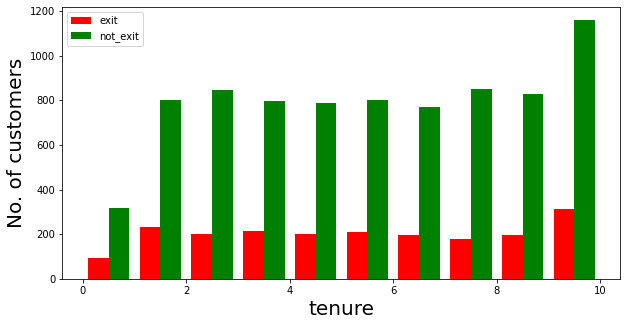

In [21]:
plt.figure(figsize=(10,5))
plt.hist([data_exited, data_not_exited], color=['red', 'green'], label = ['exit', 'not_exit'])
plt.xlabel("tenure",fontsize=20)
plt.ylabel("No. of customers", fontsize=20)
plt.legend()

In [22]:
cols_to_scale = ['CustomerId','CreditScore', 'Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])


In [24]:
x = data.drop('Exited', axis= 'columns')
y = data['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state =1)
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13,),activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.7986
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4534 - accuracy: 0.8064
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8092
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.8158
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8177
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4140 - accuracy: 0.8249
Epoch 7/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4066 - accuracy: 0.8269
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3999 - accuracy: 0.8320
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8310
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3885 - accura

In [25]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 1s 3ms/step - loss: 0.3377 - accuracy: 0.8605


[0.33768147230148315, 0.8604999780654907]

In [27]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.76      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

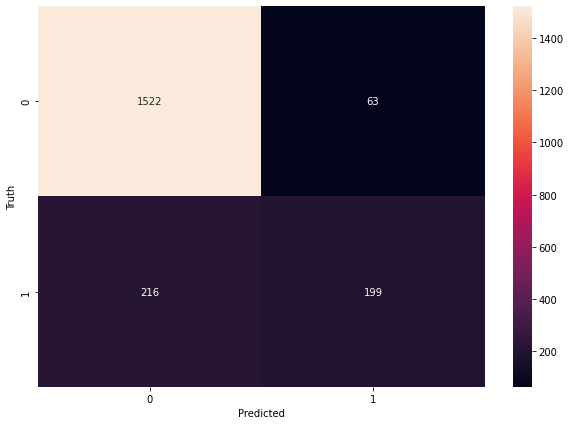

In [28]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')